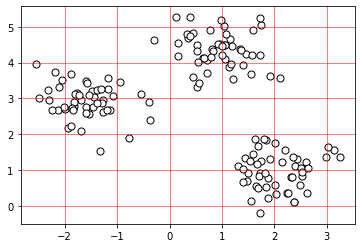

In [19]:
#https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

#make_blobs algorithm: Generate isotropic Gaussian blobs for clustering.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)

#Customize the Grids
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')

plt.show()

In [9]:
from sklearn.cluster import KMeans

'''One way to deal with convergence problems is to choose larger values for tol, which is a parameter that controls the 
tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence. In the preceding 
code, we chose a tolerance of 1e-04 (= 0.0001).
'''
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

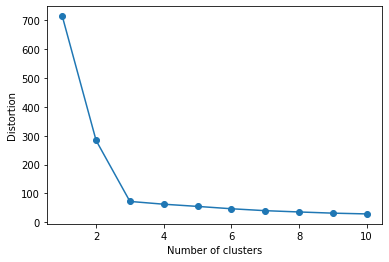

In [5]:
'''The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. 
Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease
'''

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()